# Data Analysis of trending advertising videos

## Table of Contents

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Project-settings" data-toc-modified-id="Project-settings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Project settings</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Some-additional-settings" data-toc-modified-id="Some-additional-settings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Some additional settings</a></span></li><li><span><a href="#Data-Sources-/-Directories" data-toc-modified-id="Data-Sources-/-Directories-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Sources / Directories</a></span></li></ul></li><li><span><a href="#Functions---helpers-:)" data-toc-modified-id="Functions---helpers-:)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions - helpers :)</a></span><ul class="toc-item"><li><span><a href="#overview_df()" data-toc-modified-id="overview_df()-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>overview_df()</a></span></li><li><span><a href="#db_connection()" data-toc-modified-id="db_connection()-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>db_connection()</a></span></li><li><span><a href="#select_table()" data-toc-modified-id="select_table()-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>select_table()</a></span></li><li><span><a href="#write_df_to_csv()" data-toc-modified-id="write_df_to_csv()-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>write_df_to_csv()</a></span></li><li><span><a href="#check_file_exist()" data-toc-modified-id="check_file_exist()-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>check_file_exist()</a></span></li></ul></li><li><span><a href="#Connecting-to-the-database-and-loading-data" data-toc-modified-id="Connecting-to-the-database-and-loading-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Connecting to the database and loading data</a></span></li><li><span><a href="#Prepare-the-data-for-analysis" data-toc-modified-id="Prepare-the-data-for-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepare the data for analysis</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Data preprocessing</a></span></li></ul></li><li><span><a href="#Store-data-to-the-*csv-file:" data-toc-modified-id="Store-data-to-the-*csv-file:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Store data to the *csv file:</a></span></li></ul></div>

## Project settings

### Importing libraries

In [1]:
import os 
import sys 
import pandas as pd
import numpy as np

from sqlalchemy import create_engine
from scipy import stats

# visualization & EDA
from pandas_profiling import ProfileReport
import plotly
import plotly.express as px
import plotly.io as pio
pio.templates.default = "none"

# to show warnings only once:
import warnings; warnings.filterwarnings(action='once')

# avoid warnings (if necessary)
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

# to print all the outputs in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set pandas max number of columns and rows to print
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### Data Sources / Directories

In [2]:
# directories for saving files:

target_dir = 'datasets/'

## Functions - helpers :)

###  overview_df()

In [3]:
def overview_df(df):
    """
    The function uses the pandas_profiling library to create a report and display it in a Jupyter notebook using widgets.
    """
    
    profile = ProfileReport(df,
                            title='Pandas Profiling Report',
                            plot={'histogram': {'bins': 8}},
                            explorative=True)
    
    return profile.to_widgets()

###  db_connection()

In [4]:
def db_connection(connection_string):
    """
    The function establishes a connection to the database and returns engine.
    """
    try:
        connection = create_engine(connection_string)
        print('The database connection is established successfully :)')
        return connection

    except:
        print('No connection!')

###  select_table()

In [5]:
def select_table(engine, query):
    """
    The function selects and returns a table from the database upon request. 
    """
    try:    
        table = pd.io.sql.read_sql(query, con=engine)
        print('The table was loaded successfully :)')
        return table

    except:
        print('Table not loaded!')

###  write_df_to_csv()

In [6]:
def write_df_to_csv(df, target_dir, file_name):
    """
    The function writes object to a comma-separated values (csv) file. 
    """
    try:
        df.to_csv(os.path.join(target_dir, file_name), index=False, sep='\t')
        print('Success: file {} was created.'.format(file_name))

    except:
        print('File not created!')    

###  check_file_exist()

In [7]:
def check_file_exist(target_dir, file_name):
    """
    The function also checks that the file has been written.
    """
    try:
        os.path.exists(target_dir + file_name)
        print('File exist.')
        
    except:
        FileNotFoundError    

## Connecting to the database and loading data

*Defining parameters and connecting to the database*

In [8]:
db_config = {
    'user': 'practicum_student',  # user name
    'pwd': '',  # password
    'host': '', # host
    'port': ,  # connection port
    'db': ''  # the name of the database
}

# Creating the database connection string:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], 
                                                         db_config['pwd'], 
                                                         db_config['host'], 
                                                         db_config['port'],
                                                         db_config['db'])
engine = db_connection(connection_string)

The database connection is established successfully :)


*Loading data*

In [9]:
# SQL query
query = '''SELECT * FROM trending_by_time'''

data_raw = select_table(engine, query)

The table was loaded successfully :)


## Prepare the data for analysis

### Overview

In [10]:
overview_df(data_raw)

In [11]:
data_raw.groupby(
    'category_title')['record_id'].count().reset_index().sort_values(
        by='record_id', ascending=False)

,category_title,record_id
11,People & Blogs,942
3,Entertainment,942
1,Comedy,940
9,News & Politics,939
4,Film & Animation,938
8,Music,938
6,Howto & Style,937
15,Sports,933
13,Science & Technology,881
2,Education,863


In [12]:
# the value that appears most often:

data_raw.videos_count.mode()

0    2
dtype: int64

> ***Preliminary overview:***

* The dataset has 12343 records and 5 variables.
* The dataset contains data on the number of videos collected from November 14, 2017, to June 16, 2018, inclusive.
* There are 5 unique regions (number of records in descending order): 'Russia', 'United States', 'France', 'India', 'Japan'.
* There are 18 video categories defined in the dataset. 
* The top 5 categories by the number of records: 
    - Entertainment
    - People & Blogs
    - Comedy
    - News & Politics
    - Film & Animation
* The minimum records of 2 belong to the 'Trailers' category.
* The dataset contains no duplicates or missing records.
* The distribution of the `video_counts` variable has a positive skew of 2.33. The minimum and the mode, the value that appears most often, of the `video_counts` is equal to 2. This means that this variable has outliers and needs preprocessing.

### Data preprocessing

The distribution of the number of videos in the trending section by the category.

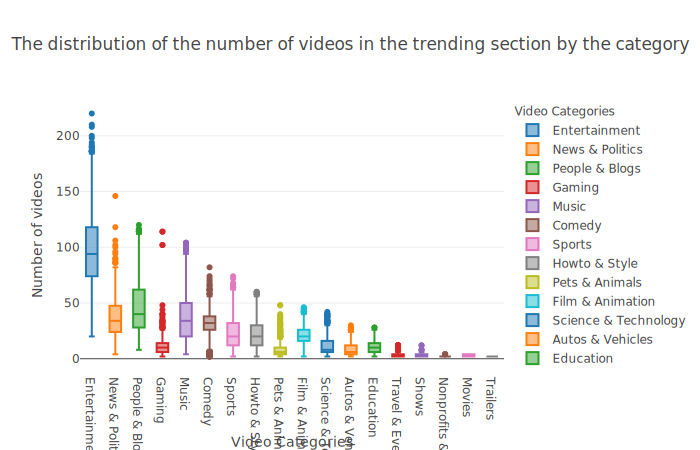

In [13]:
fig = px.box(data_raw.sort_values(by='videos_count', ascending=False),
             x="category_title",
             y="videos_count",
             color='category_title',
             hover_name='category_title',
             labels={
                 'category_title': 'Video Categories',
                 'videos_count': 'Number of videos',
             },
             title="The distribution of the number of videos in the trending section by the category")
fig.show('svg')

*As the boxplot shows, our dataset has outliers, especially 'Gaming', 'News & Politics' and 'Entertainment' categories.*

*And now let's examine / define outliers using Z-Score.*

*Z-Score tells how far a point is from the mean of session_duration_sec in terms of standard deviation.* 

In [14]:
z_score = np.abs(stats.zscore(data_raw['videos_count']))
z_score

array([0.65604796, 0.85744238, 0.72317943, ..., 0.85744238, 0.85744238,
       0.85744238])

*We can consider the absolute value of z-score above 3 as Outliers.*

In [15]:
# number of rows with outliers
n_outliers = len(data_raw[z_score > 3]) 
n_outliers

# % of rows with outliers
p_outliers = round(n_outliers / data_raw.shape[0] * 100, 2)
p_outliers

248

2.01

*The dataset contains 248 entities - outliers that equals to 2.01% of all the records.*

*Let's remove them from the dataset:*

In [16]:
data_raw.shape[0]

data_raw = data_raw[z_score <= 3]

# verifying the result
data_raw.shape[0]

data_raw.videos_count.skew(skipna=True)

12343

12095

1.5959996963742775

*As we can see, after removing the outliers, the skewness significantly decreased from 2.33 to 1.6.*

*Let's now take a look at the updated distribution of the `video_counts` variable by video category:*

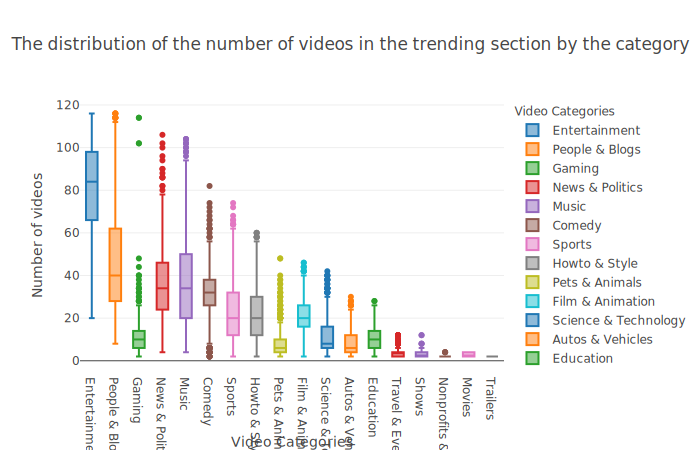

In [17]:
fig = px.box(data_raw.sort_values(by='videos_count', ascending=False),
             x="category_title",
             y="videos_count",
             color='category_title',
             hover_name='category_title',
             labels={
                 'category_title': 'Video Categories',
                 'videos_count': 'Number of videos',
             },
             title="The distribution of the number of videos in the trending section by the category")
fig.show('svg')

*We can see from the interactive graphical view that the 'Gaming' category still has explicit outliers.*

*Let's take a closer look at them:*

In [18]:
# Filter all rows for which the video_count' in 'Gaming' is more than 48

row_filtered = data_raw[(data_raw['category_title'] == 'Gaming')
                        & (data_raw['videos_count'] > 48)]
row_filtered

# Total records of 'Gaming' category title:
data_raw.query('category_title == "Gaming"').shape[0]

,record_id,region,trending_date,category_title,videos_count
5605,5606,Japan,2018-03-13,Gaming,102
5606,5607,Japan,2018-03-14,Gaming,102
7685,7686,Russia,2018-03-13,Gaming,114
7686,7687,Russia,2018-03-14,Gaming,114


767

*4 entries out of 767 "Gaming" are emissions. I consider dropping them from the dataset.*

In [19]:
criteria_to_drop = ((data_raw['category_title'] == 'Gaming') &
                    (data_raw['videos_count'] > 48))

data_raw.drop(data_raw[criteria_to_drop].index, inplace=True)

# verifying the result:
len(data_raw[(data_raw['category_title'] == 'Gaming')
             & (data_raw['videos_count'] > 48)])

0

*After preprocessing the distribution of the `video_counts` variable by video category looks like:*

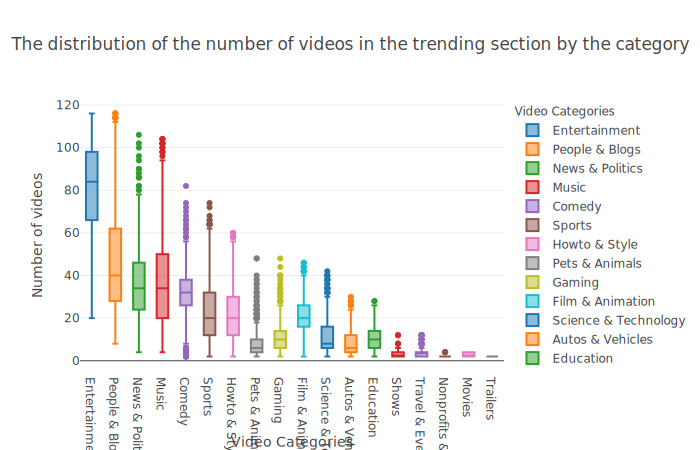

In [20]:
fig = px.box(data_raw.sort_values(by='videos_count', ascending=False),
             x="category_title",
             y="videos_count",
             color='category_title',
             hover_name='category_title',
             labels={
                 'category_title': 'Video Categories',
                 'videos_count': 'Number of videos',
             },
             title="The distribution of the number of videos in the trending section by the category")
fig.show('svg')

>***Conclusion:***
* The dataset has been processed and still has outliers in the `videos_count` variable. But now I'm not sure that we have to continue to clean our dataset of them. I'd rather ask the management what to do with them.
* Meanwhile, let's consider our dataset as if it is ready for further exploration and preparation of dashboards for decision making.

* According to the assignment, dashboards should be created on the Tableau platform. For this, we need a a comma-separated values (*csv) file.

 So let's write our dataset to a csv file.

## Store data to the *csv file:

In [21]:
file_name = 'trending_by_time.csv'

write_df_to_csv(data_raw, target_dir, file_name)

Success: file trending_by_time.csv was created.


In [22]:
# checking the result:
check_file_exist(target_dir, file_name)

File exist.


>***Now, let's continue exploring our dataset and create a dashboard in Tableau public.***

[Link to the Dashboard on the Tableau Public Platform](https://public.tableau.com/profile/aliona808#!/vizhome/VideoTrendsonYouTube/VideoTrendsonYouTubeNov2017-Jun2018)